In [ ]:
pip install statsmodels

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

In [ ]:
# Loading dataset
df = pd.read_csv("/content/RealTimeConsumption-31122015-12092020.csv")

In [ ]:
df.head(5)

,Date,Hour,Consumption (MWh)
0,31.12.2015,00:00,"29,590.88"
1,31.12.2015,01:00,"27,785.43"
2,31.12.2015,02:00,"26,516.53"
3,31.12.2015,03:00,"26,091.62"
4,31.12.2015,04:00,"25,871.54"


In [ ]:
df.tail(5)

,Date,Hour,Consumption (MWh)
41227,12.09.2020,19:00,"39,671.18"
41228,12.09.2020,20:00,"37,713.66"
41229,12.09.2020,21:00,172.67
41230,12.09.2020,22:00,0.00
41231,12.09.2020,23:00,0.00


In [ ]:
# Converting date to pandas datetime
df['Date'] = pd.to_datetime(df['Date'])
# Now index will be Date
df.set_index('Date', inplace=True)

In [ ]:
df.tail(5)

,Hour,Consumption (MWh)
Date,,
2020-09-12,19:00,"39,671.18"
2020-09-12,20:00,"37,713.66"
2020-09-12,21:00,172.67
2020-09-12,22:00,0.00
2020-09-12,23:00,0.00


In [ ]:
df.isnull().sum()

Hour                 0
Consumption (MWh)    0
dtype: int64

In [ ]:
df.describe()

,Hour,Consumption (MWh)
count,41232,41232
unique,24,40737
top,04:00,"27,340.44"
freq,1719,3


In [ ]:
df.dtypes

Hour                 object
Consumption (MWh)    object
dtype: object

In [ ]:
df['Day'] = df.index.day
df['Month'] = df.index.month
df['Year'] = df.index.year

In [ ]:

# Convert hour column to datetime hour
df['Hour'] = df['Hour'].astype(str)
df['Hour'] = pd.to_datetime(df['Hour'], format='%H:%M').dt.hour

In [ ]:
df['Consumption (MWh)'].astype(str)[1][-6]

'7'

In [ ]:
df['Consumption (MWh)'].astype(str)[1][:-7]

'27'

In [ ]:
df['Consumption (MWh)'].astype(str)[1][-6:]

'785.43'

In [ ]:
for i in range(len(df)):
  df['Consumption (MWh)'][i] = df['Consumption (MWh)'].astype(str)[i][:-7] + df['Consumption (MWh)'].astype(str)[i][-6:]


In [ ]:
df.head(5)

,Hour,Consumption (MWh),Day,Month,Year
Date,,,,,
2015-12-31,0,2590.88,31,12,2015
2015-12-31,1,2785.43,31,12,2015
2015-12-31,2,2516.53,31,12,2015
2015-12-31,3,2091.62,31,12,2015
2015-12-31,4,2871.54,31,12,2015


In [ ]:
df['Consumption (MWh)'] = df['Consumption (MWh)'].astype(float)

In [ ]:
df.dtypes

Hour                   int32
Consumption (MWh)    float64
Day                    int32
Month                  int32
Year                   int32
dtype: object

In [ ]:
#df.to_csv('/content/cleaned_consumption_data.csv', index=True)

In [ ]:
df = pd.read_csv("/content/powerconsumption.csv")

In [ ]:
df.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [ ]:
df

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [ ]:
df.dtypes

Datetime                   object
Temperature               float64
Humidity                  float64
WindSpeed                 float64
GeneralDiffuseFlows       float64
DiffuseFlows              float64
PowerConsumption_Zone1    float64
PowerConsumption_Zone2    float64
PowerConsumption_Zone3    float64
dtype: object

In [ ]:

# Converting date to pandas datetime
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

Hourly data


In [ ]:
df_hour = df.resample('H').sum()

In [ ]:
# Plot of Consumption vs hour Zone 1
fig = px.line(df_hour, x=df_hour.index, y="PowerConsumption_Zone1")
fig.show()

Daily data

In [ ]:
df_date = df.resample('D').sum()

In [ ]:
# Plot of Consumption vs date Zone 1
fig = px.line(df_date, x=df_date.index, y="PowerConsumption_Zone1")
fig.show()

In [ ]:
# Plot of Consumption vs date Zone 2
fig = px.line(df_date, x=df_date.index, y="PowerConsumption_Zone2")
fig.show()

In [ ]:
# Plot of Consumption vs date Zone 3
fig = px.line(df_date, x=df_date.index, y="PowerConsumption_Zone3")
fig.show()

Weekely Data

In [ ]:
df_week = df.resample('W').sum()

In [ ]:
# Plot of Consumption vs date Zone 1
fig = px.line(df_week, x=df_week.index, y="PowerConsumption_Zone1")
fig.show()
fig2 = px.line(df_week, x=df_week.index, y="PowerConsumption_Zone2")
fig2.show()
fig3 = px.line(df_week, x=df_week.index, y="PowerConsumption_Zone3")
fig3.show()

Monthly data

In [ ]:
df_month = df.resample('M').sum()

In [ ]:
# Plot of Consumption vs date Zone 1
fig = px.line(df_month, x=df_month.index, y="PowerConsumption_Zone1")
fig.show()

In [ ]:
# Plot of Consumption vs date Zone 2
fig = px.line(df_month, x=df_month.index, y="PowerConsumption_Zone2")
fig.show()

In [ ]:
# Plot of Consumption vs date Zone 3
fig = px.line(df_month, x=df_month.index, y="PowerConsumption_Zone3")
fig.show()

Seasonality Check

In [ ]:
# Perform Fourier Transform
fft_vals = np.fft.fft(df_date['PowerConsumption_Zone1'])
fft_freqs = np.fft.fftfreq(len(df_date))

# Only keep the positive frequencies
positive_freqs = fft_freqs[fft_freqs >= 0]
positive_vals = np.abs(fft_vals[fft_freqs >= 0])

fig = px.line(y= positive_vals, x=positive_freqs, title='Periodogram')
fig.update_layout(
    xaxis_title='Frequency',
    yaxis_title='Amplitude'
)
fig.show()

From the above we can see there is a peak at x = 0.1428571 which is equal to 1/Period. Therefore Seasonal Period of "Vol" data can be taken as 7

In [ ]:
# Perform Fourier Transform
fft_vals = np.fft.fft(df_date['PowerConsumption_Zone2'])
fft_freqs = np.fft.fftfreq(len(df_date))

# Only keep the positive frequencies
positive_freqs = fft_freqs[fft_freqs >= 0]
positive_vals = np.abs(fft_vals[fft_freqs >= 0])

fig = px.line(y= positive_vals, x=positive_freqs, title='Periodogram')
fig.update_layout(
    xaxis_title='Frequency',
    yaxis_title='Amplitude'
)
fig.show()

From the above we can see there is a peak at x = 0.1428571 which is equal to 1/Period. Therefore Seasonal Period of "Vol" data can be taken as 7

In [ ]:
# Perform Fourier Transform
fft_vals = np.fft.fft(df_date['PowerConsumption_Zone3'])
fft_freqs = np.fft.fftfreq(len(df_date))

# Only keep the positive frequencies
positive_freqs = fft_freqs[fft_freqs >= 0]
positive_vals = np.abs(fft_vals[fft_freqs >= 0])

fig = px.line(y= positive_vals, x=positive_freqs, title='Periodogram')
fig.update_layout(
    xaxis_title='Frequency',
    yaxis_title='Amplitude'
)
fig.show()

From the above we can see there is a peak at x = 0.01098901 which is equal to 1/Period. Therefore Seasonal Period of "Vol" data can be taken as 91.

**Let's decompose our data to see Trend, Seasonality and Irregular components.**

In [ ]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

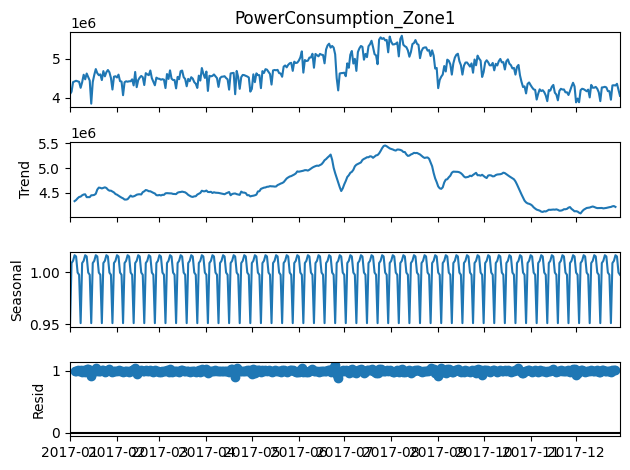

In [ ]:

dec = sm.tsa.seasonal_decompose(df_date['PowerConsumption_Zone1'],period = 7, model = 'multiplicative').plot()
plt.show()

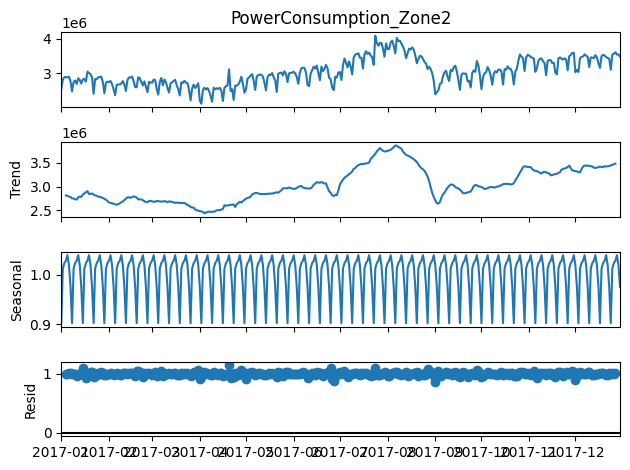

In [ ]:
dec = sm.tsa.seasonal_decompose(df_date['PowerConsumption_Zone2'],period = 7, model = 'multiplicative').plot()
plt.show()

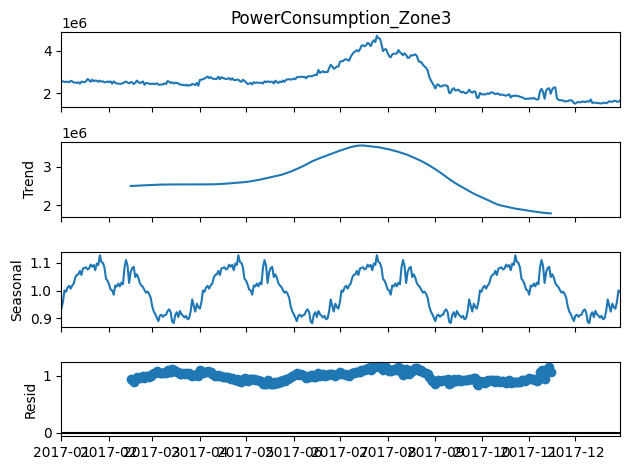

In [ ]:
dec = sm.tsa.seasonal_decompose(df_date['PowerConsumption_Zone3'],period = 90, model = 'multiplicative').plot()
plt.show()

**Defining Dickey-Fuller test for Stationarity**

In [ ]:
#Ho: It is non stationary
#H1: It is stationary
from statsmodels.tsa.stattools import adfuller

def adfuller_test(col):
    result=adfuller(col)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(df_date['PowerConsumption_Zone1'])

ADF Test Statistic : -1.5591473246082608
p-value : 0.5040758794686822
#Lags Used : 14
Number of Observations Used : 349
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
adfuller_test(df_date['PowerConsumption_Zone2'])

ADF Test Statistic : -1.5255067262811655
p-value : 0.5208579202654547
#Lags Used : 15
Number of Observations Used : 348
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
adfuller_test(df_date['PowerConsumption_Zone3'])

ADF Test Statistic : -1.4997942779922553
p-value : 0.5336131041904824
#Lags Used : 16
Number of Observations Used : 347
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Consumption data is not stationary So to make it stationary we need to use differencing in data


**Differencing (x_t - x_t-7) in zone 1 and 2**

In [ ]:
df_date['zone1_first_diff'] = df_date['PowerConsumption_Zone1'].diff(periods = 7)
df_date['zone2_first_diff'] = df_date['PowerConsumption_Zone2'].diff(periods = 7)

adfuller_test(df_date['zone1_first_diff'][7:])
adfuller_test(df_date['zone2_first_diff'][7:])

ADF Test Statistic : -3.7751844187488564
p-value : 0.0031716635616630584
#Lags Used : 16
Number of Observations Used : 340
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
ADF Test Statistic : -3.334323365900338
p-value : 0.013412219188187817
#Lags Used : 15
Number of Observations Used : 341
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


After taking first difference of perod 7 data is stationary
for zone 1&2

In [ ]:
df_date['zone3_first_diff'] = df_date['PowerConsumption_Zone3'].diff(periods = 90)

adfuller_test(df_date['zone3_first_diff'][90:])

ADF Test Statistic : -1.7358501280017686
p-value : 0.41274244951996414
#Lags Used : 16
Number of Observations Used : 257
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Zone 3 is aslo stationary at 1st difference of period 7

In [ ]:
fig = px.line(df_date, x=df_date.index, y="zone1_first_diff")
fig.show()

In [ ]:
fig = px.line(df_date, x=df_date.index, y="zone2_first_diff")
fig.show()

In [ ]:
fig = px.line(df_date, x=df_date.index, y="zone3_first_diff")
fig.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Modelling

ACF & PACF Plots for "zone1", "Zone 2"  and "zone 3" data

**Zone1**

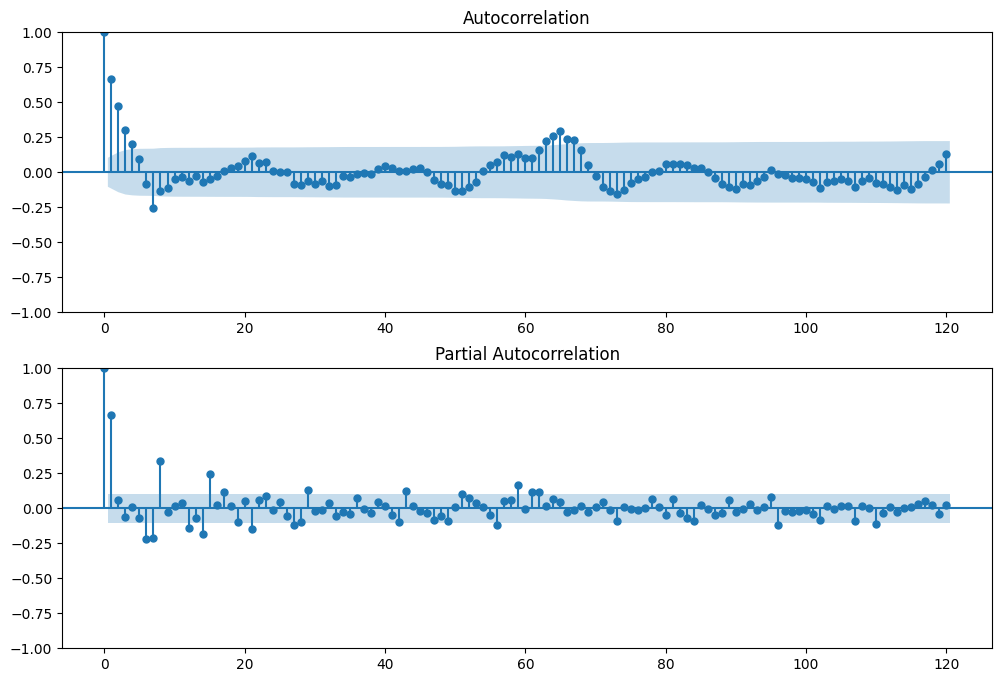

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_date['zone1_first_diff'].iloc[7:],lags=120,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_date['zone1_first_diff'].iloc[7:],lags=120,ax=ax2)

ACF tends to 0 after 4 lags and spikes occur at period of 7 in PACF

**Zone 2**

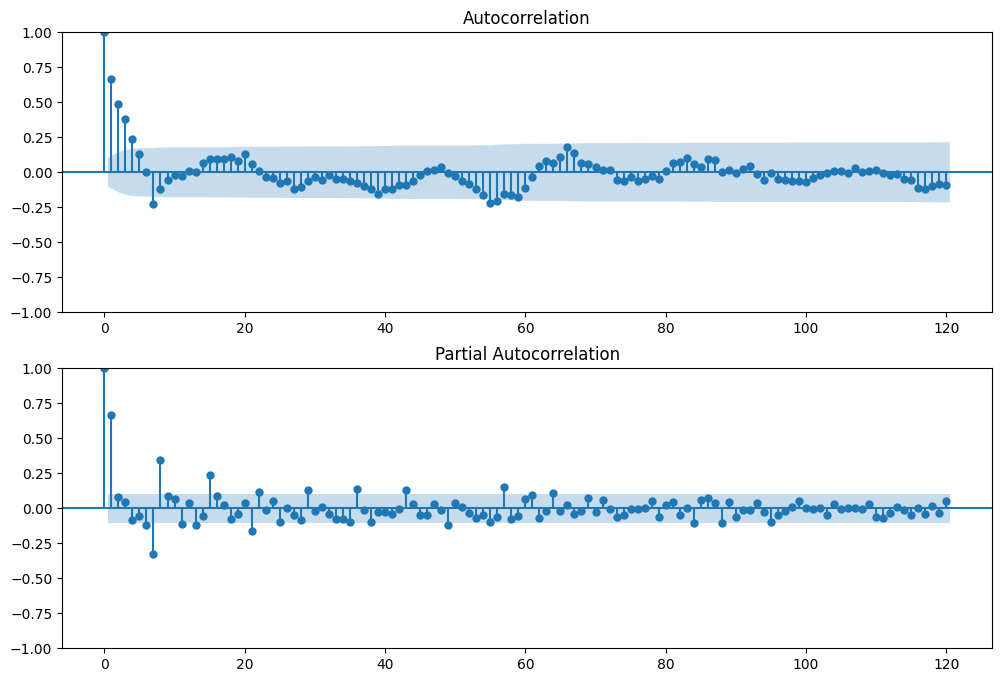

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_date['zone2_first_diff'].iloc[7:],lags=120,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_date['zone2_first_diff'].iloc[7:],lags=120,ax=ax2)

ACF tends to 0 after 4 lags and spikes occur at period of 7 in PACF

**Zone 3**

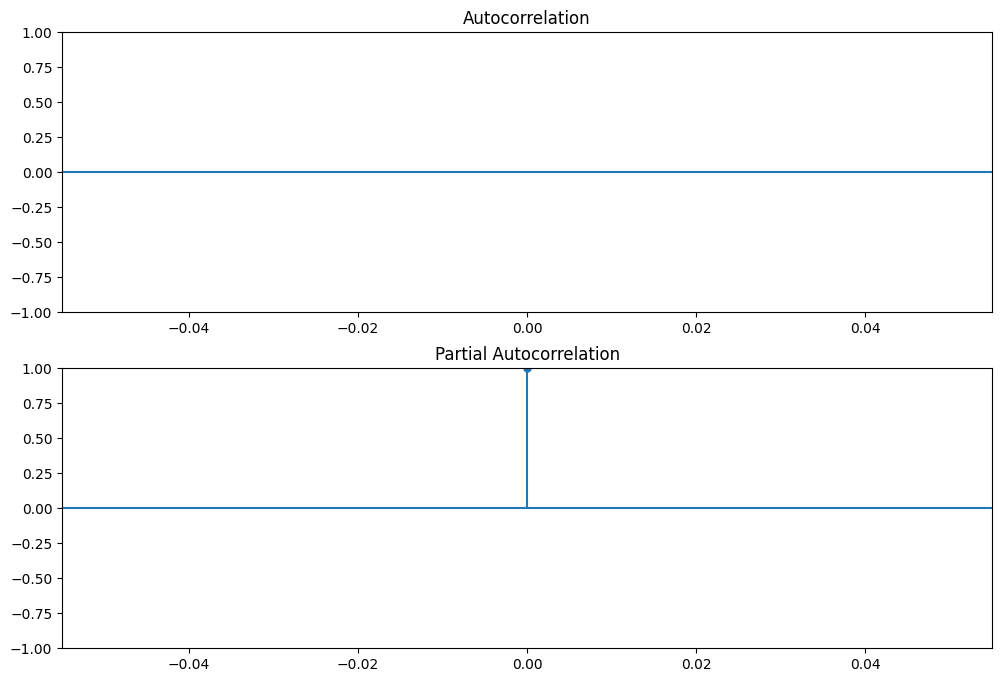

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_date['zone3_first_diff'].iloc[7:],lags=120,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_date['zone3_first_diff'].iloc[7:],lags=120,ax=ax2)

ACF tends to 0 after 6 lags and spikes occur at period of 7 in PACF

In [ ]:
df_date.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,zone1_first_diff,zone2_first_diff,zone3_first_diff
Datetime,,,,,,,,,,,
2017-01-01,1393.243,9866.78,45.381,17480.271,3743.125,4.098993e+06,2.554242e+06,2.573107e+06,NaN,NaN,NaN
2017-01-02,1796.670,10289.71,11.025,17338.246,3920.747,4.157207e+06,2.816312e+06,2.566190e+06,NaN,NaN,NaN
2017-01-03,1742.400,10797.36,11.047,17378.786,4114.751,4.400992e+06,2.888247e+06,2.537396e+06,NaN,NaN,NaN
2017-01-04,1513.365,10866.21,11.868,17706.142,4151.120,4.419336e+06,2.894699e+06,2.545012e+06,NaN,NaN,NaN
2017-01-05,1564.768,10229.83,12.081,17099.980,4282.767,4.435619e+06,2.884888e+06,2.543641e+06,NaN,NaN,NaN


**Splitting Dataset**

In [ ]:
# Split the data into train and test sets
train_size = int(len(df_date) * 0.9)
train_zone1, test_zone1 = df_date['PowerConsumption_Zone1'].iloc[:train_size], df_date['PowerConsumption_Zone1'].iloc[train_size:]
train_zone2, test_zone2 = df_date['PowerConsumption_Zone2'].iloc[:train_size], df_date['PowerConsumption_Zone2'].iloc[train_size:]
train_zone3, test_zone3 = df_date['PowerConsumption_Zone3'].iloc[:train_size], df_date['PowerConsumption_Zone3'].iloc[train_size:]

# ARIMA

**Zone 1**

In [ ]:
# Fit ARIMA model
# (p, d, q) are the parameters of the ARIMA model. You can adjust these parameters or use auto_arima to determine the best parameters.
model = ARIMA(train_zone1, order=(4, 1, 1))
model_fit = model.fit()
# Print summary of the model
print(model_fit.summary())

                                 SARIMAX Results                                  
Dep. Variable:     PowerConsumption_Zone1   No. Observations:                  327
Model:                     ARIMA(4, 1, 1)   Log Likelihood               -4418.096
Date:                    Sat, 10 Aug 2024   AIC                           8848.192
Time:                            13:54:50   BIC                           8870.913
Sample:                        01-01-2017   HQIC                          8857.259
                             - 11-23-2017                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1312      0.776      0.169      0.866      -1.389       1.651
ar.L2          0.0387      0.106      0.365      0.715      -0.169       0.247
ar.L3         -0.065

In [ ]:
# Make predictions
predictions = model_fit.forecast(steps=len(test_zone1))
predictions = pd.Series(predictions, index=test_zone1.index)

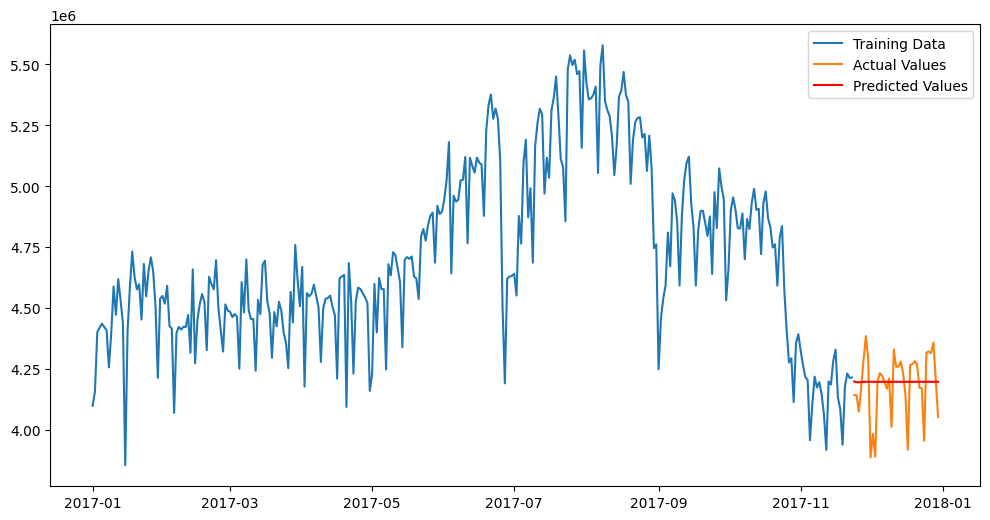

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_zone1, label='Training Data')
plt.plot(test_zone1, label='Actual Values')
plt.plot(predictions, label='Predicted Values', color='red')
plt.legend()
plt.show()

In [ ]:
#pip install pmdarima

**Zone 2**

In [ ]:
# Fit ARIMA model
# (p, d, q) are the parameters of the ARIMA model. You can adjust these parameters or use auto_arima to determine the best parameters.
model = ARIMA(train_zone2, order=(4, 1, 2))
model_fit = model.fit()

In [ ]:
# Print summary of the model
print(model_fit.summary())

                                 SARIMAX Results                                  
Dep. Variable:     PowerConsumption_Zone2   No. Observations:                  327
Model:                     ARIMA(4, 1, 2)   Log Likelihood               -4432.571
Date:                    Sat, 10 Aug 2024   AIC                           8879.142
Time:                            13:55:14   BIC                           8905.650
Sample:                        01-01-2017   HQIC                          8889.720
                             - 11-23-2017                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3083      0.113     -2.719      0.007      -0.531      -0.086
ar.L2          0.2511      0.096      2.608      0.009       0.062       0.440
ar.L3         -0.123

In [ ]:
# Make predictions
predictions = model_fit.forecast(steps=len(test_zone2))
predictions = pd.Series(predictions, index=test_zone2.index)

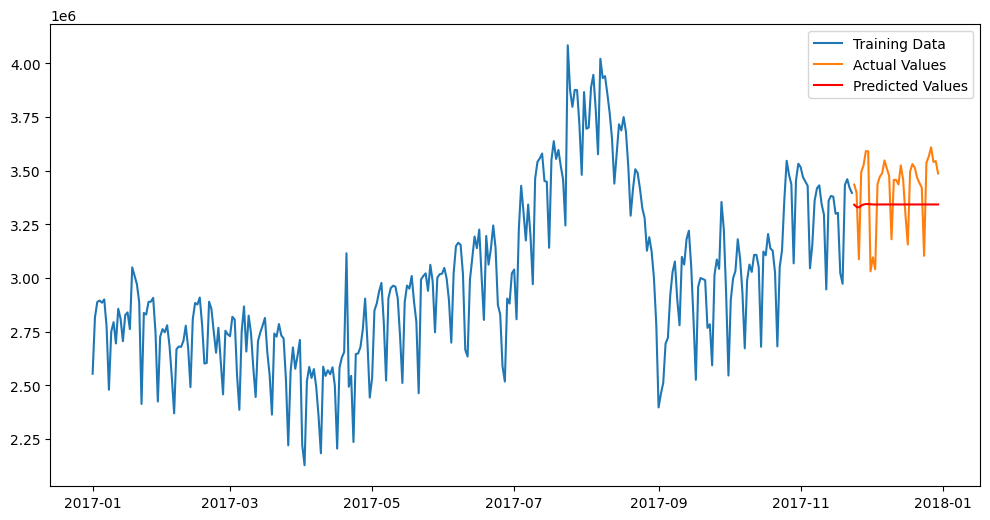

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_zone2, label='Training Data')
plt.plot(test_zone2, label='Actual Values')
plt.plot(predictions, label='Predicted Values', color='red')
plt.legend()
plt.show()

**Zone 3**

In [ ]:
# Fit ARIMA model
# (p, d, q) are the parameters of the ARIMA model. You can adjust these parameters or use auto_arima to determine the best parameters.
model = ARIMA(train_zone3, order=(6, 1, 1))
model_fit = model.fit()

In [ ]:
# Print summary of the model
print(model_fit.summary())

                                 SARIMAX Results                                  
Dep. Variable:     PowerConsumption_Zone3   No. Observations:                  327
Model:                     ARIMA(6, 1, 1)   Log Likelihood               -4194.449
Date:                    Sat, 10 Aug 2024   AIC                           8404.897
Time:                            13:55:27   BIC                           8435.193
Sample:                        01-01-2017   HQIC                          8416.987
                             - 11-23-2017                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6116      1.156     -0.529      0.597      -2.878       1.655
ar.L2         -0.0424      0.043     -0.981      0.327      -0.127       0.042
ar.L3         -0.023

In [ ]:
# Make predictions
predictions = model_fit.forecast(steps=len(test_zone3))
predictions = pd.Series(predictions, index=test_zone3.index)

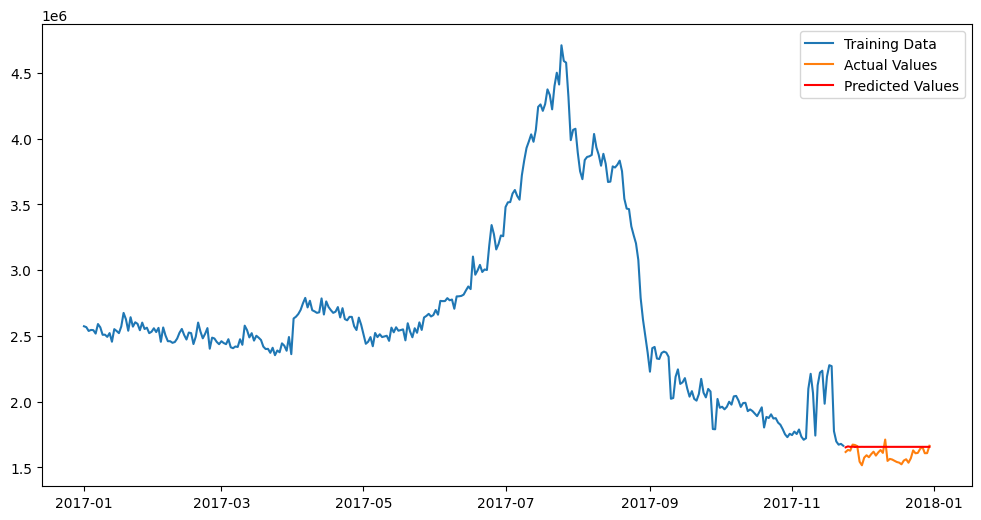

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_zone3, label='Training Data')
plt.plot(test_zone3, label='Actual Values')
plt.plot(predictions, label='Predicted Values', color='red')
plt.legend()
plt.show()

# SARIMA(p,d,q) * (P,D,Q,s)

## Zone 1

In [ ]:
# Fit SARIMA model
# (p, d, q) are the parameters for the non-seasonal part of the model.
# (P, D, Q, s) are the parameters for the seasonal part of the model.
# 's' is the periodicity of the seasonality (e.g., 7 for weekly, 12 for monthly).
# You can adjust these parameters or use auto_arima to determine the best parameters.
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model = SARIMAX(train_zone1, order=(1, 0, 3), seasonal_order=(1, 1, 1, 7))
model_fit = model.fit(disp=False)

# Forecast and get predictions for the training data to get residuals
train_predictions = model_fit.fittedvalues
residuals = train_zone1 - train_predictions

# Print summary of the model
print(model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:              PowerConsumption_Zone1   No. Observations:                  327
Model:             SARIMAX(1, 0, 3)x(1, 1, [1], 7)   Log Likelihood               -4322.159
Date:                             Sat, 10 Aug 2024   AIC                           8658.317
Time:                                     14:01:42   BIC                           8684.696
Sample:                                 01-01-2017   HQIC                          8668.851
                                      - 11-23-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.009    112.721      0.000       0.983       1.017
ma.L1         -0.6316      

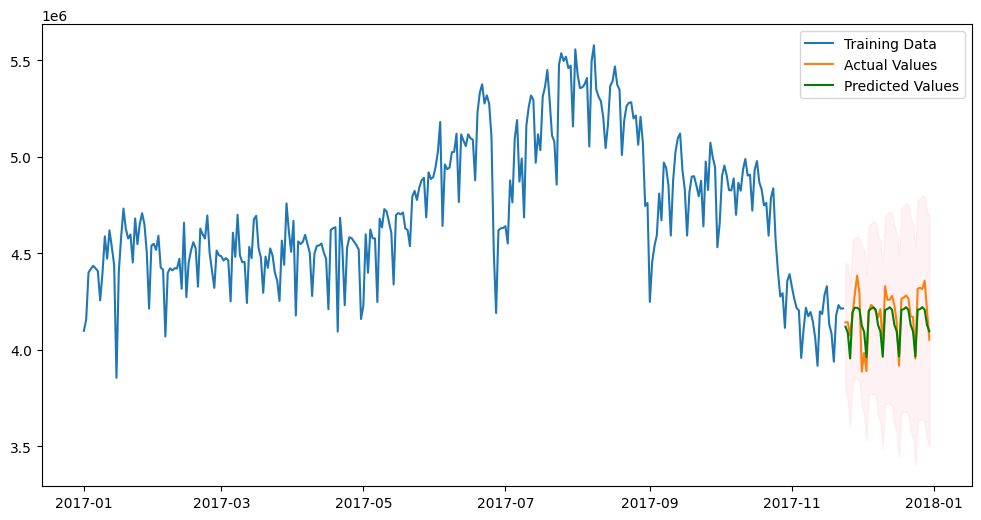

In [ ]:
# Make predictions
predictions = model_fit.get_forecast(steps=len(test_zone1))
predicted_mean = predictions.predicted_mean
conf_int = predictions.conf_int()

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_zone1, label='Training Data')
plt.plot(test_zone1, label='Actual Values')
plt.plot(predicted_mean, label='Predicted Values', color='green')
plt.fill_between(predicted_mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.legend()
plt.show()

### Residual Analysis

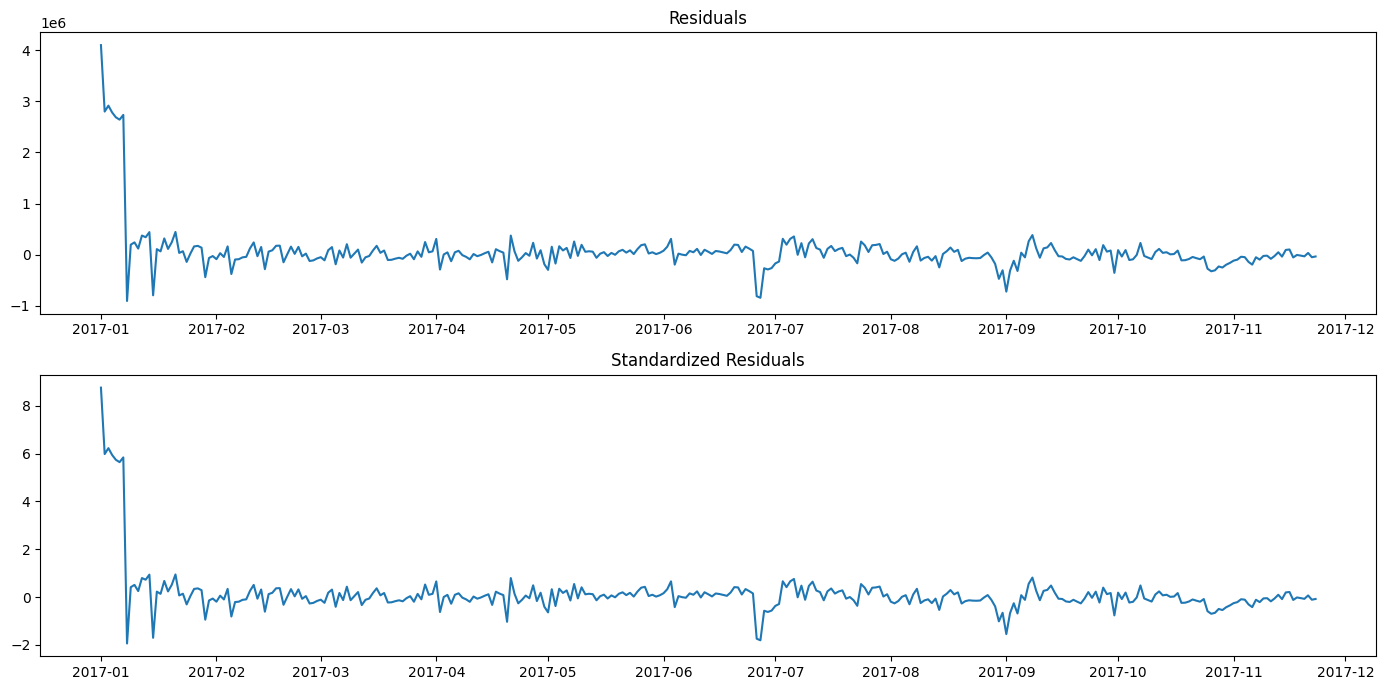

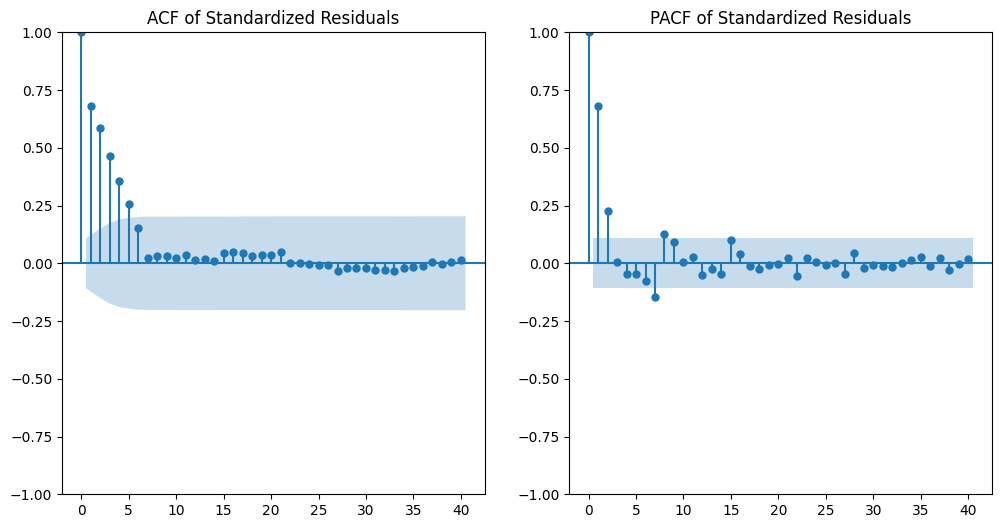

Ljung-Box test result:
       lb_stat     lb_pvalue
10  411.140348  4.000631e-82
Reject the null hypothesis: Residuals are not independently distributed.


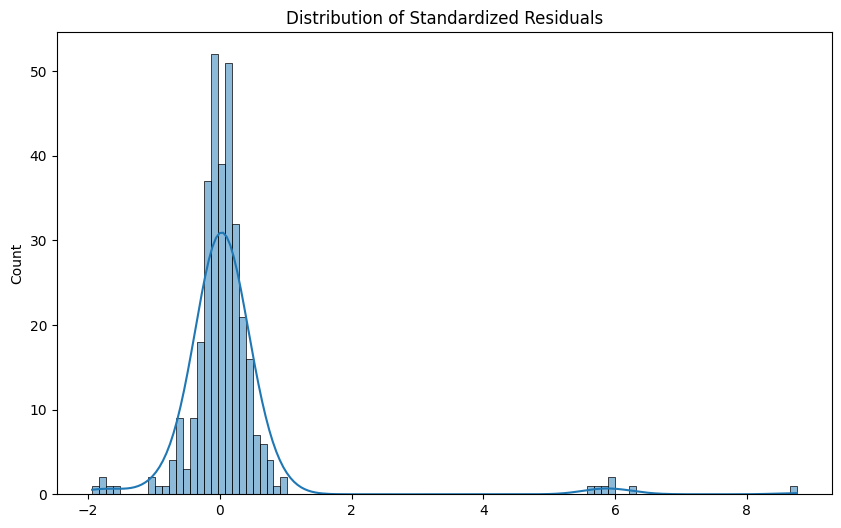

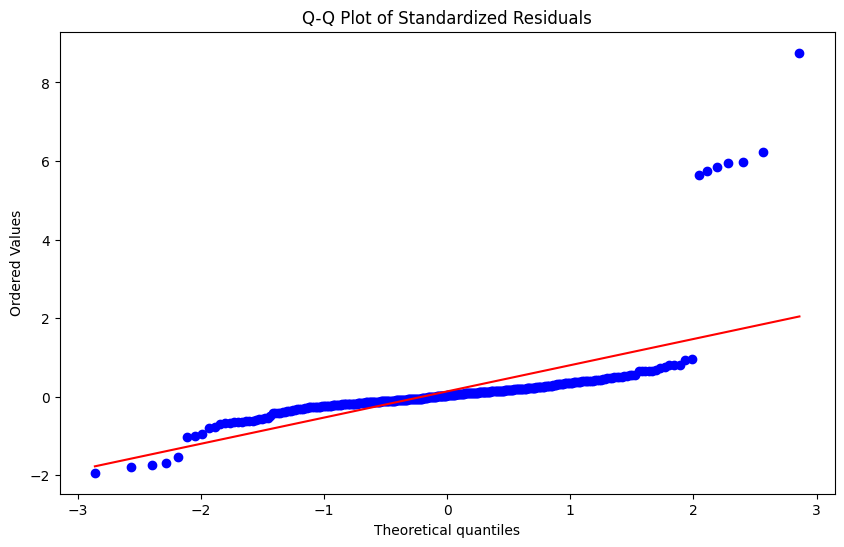

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import stats

# Residuals
residuals = model_fit.resid
standardized_residuals = residuals / np.std(residuals)

# Plot the residuals and standardized residuals
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(residuals)
plt.title('Residuals')

plt.subplot(2, 1, 2)
plt.plot(standardized_residuals)
plt.title('Standardized Residuals')

plt.tight_layout()
plt.show()

# Plot ACF and PACF of standardized residuals
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(standardized_residuals, ax=plt.gca(), lags=40)
plt.title('ACF of Standardized Residuals')
plt.subplot(122)
plot_pacf(standardized_residuals, ax=plt.gca(), lags=40)
plt.title('PACF of Standardized Residuals')
plt.show()

# Perform Ljung-Box test
ljung_box_result = acorr_ljungbox(standardized_residuals, lags=[10], return_df=True)
print("Ljung-Box test result:")
print(ljung_box_result)

# Interpretation
if ljung_box_result['lb_pvalue'].values[0] > 0.05:
    print("Fail to reject the null hypothesis: Residuals are independently distributed.")
else:
    print("Reject the null hypothesis: Residuals are not independently distributed.")

# Plot the distribution of the standardized residuals
plt.figure(figsize=(10, 6))
sns.histplot(standardized_residuals, kde=True)
plt.title('Distribution of Standardized Residuals')
plt.show()

# Plot Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(standardized_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Standardized Residuals')
plt.show()

## Zone 2

In [ ]:
model = SARIMAX(train_zone2, order=(1, 0, 3), seasonal_order=(1, 1, 1, 7))
model_fit = model.fit(disp=False)

# Forecast and get predictions for the training data to get residuals
train_predictions = model_fit.fittedvalues
residuals = train_zone2 - train_predictions

# Print summary of the model
print(model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:              PowerConsumption_Zone2   No. Observations:                  327
Model:             SARIMAX(1, 0, 3)x(1, 1, [1], 7)   Log Likelihood               -4267.307
Date:                             Sat, 10 Aug 2024   AIC                           8548.615
Time:                                     14:04:22   BIC                           8574.993
Sample:                                 01-01-2017   HQIC                          8559.148
                                      - 11-23-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9882      0.009    113.075      0.000       0.971       1.005
ma.L1         -0.4764      

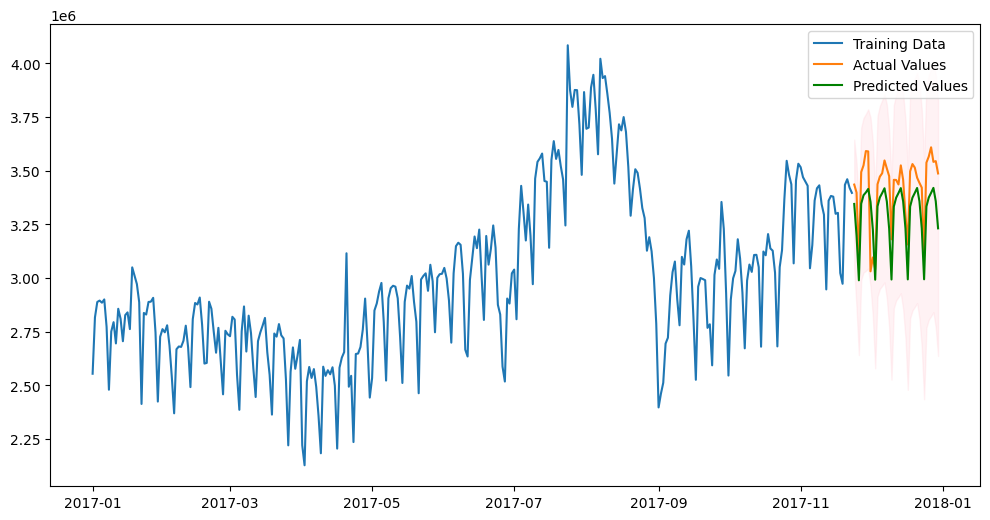

In [ ]:
# Make predictions
predictions = model_fit.get_forecast(steps=len(test_zone2))
predicted_mean = predictions.predicted_mean
conf_int = predictions.conf_int()

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_zone2, label='Training Data')
plt.plot(test_zone2, label='Actual Values')
plt.plot(predicted_mean, label='Predicted Values', color='green')
plt.fill_between(predicted_mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.legend()
plt.show()

### Residual Analysis

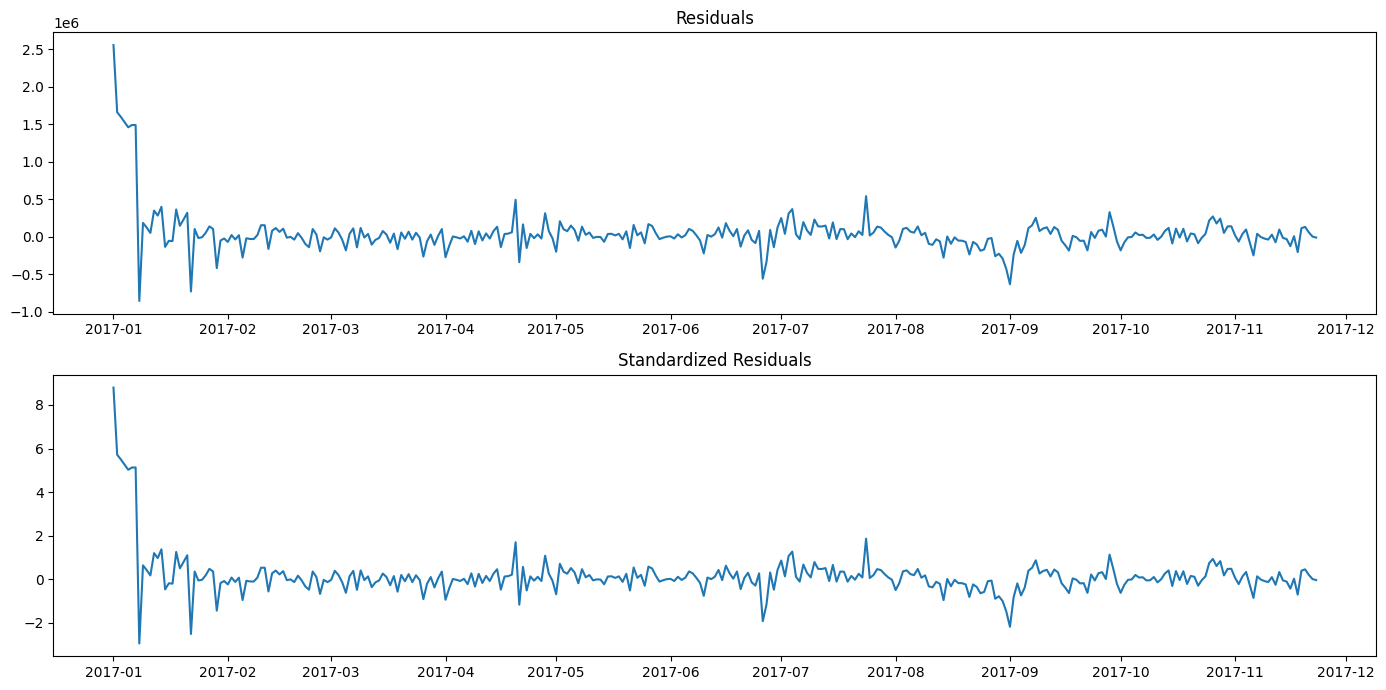

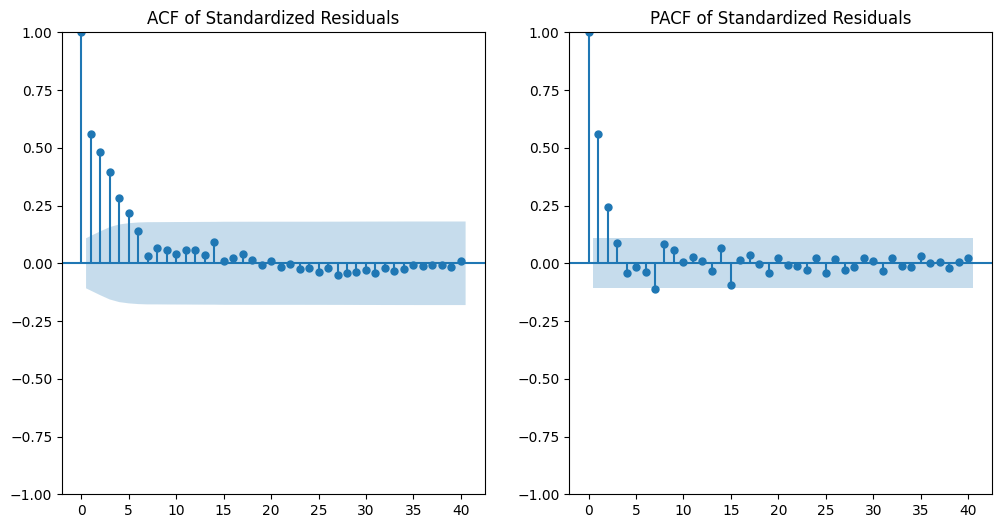

Ljung-Box test result:
       lb_stat     lb_pvalue
10  284.581309  2.810233e-55
Reject the null hypothesis: Residuals are not independently distributed.


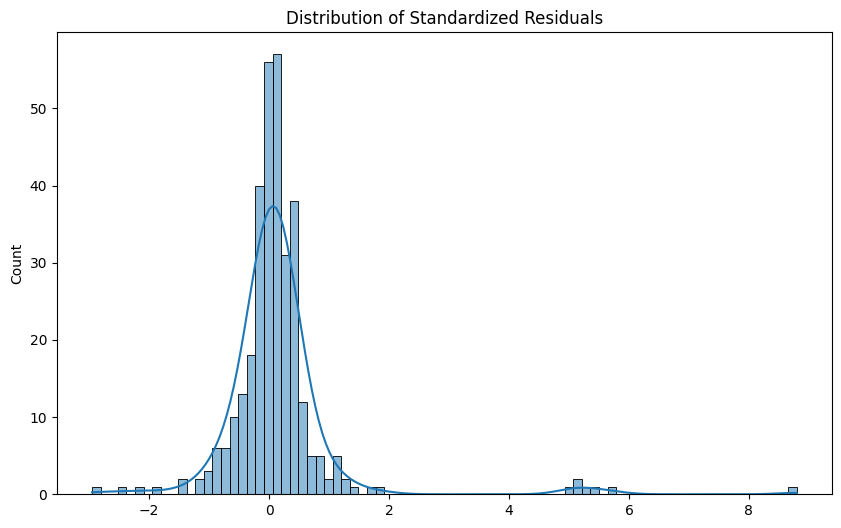

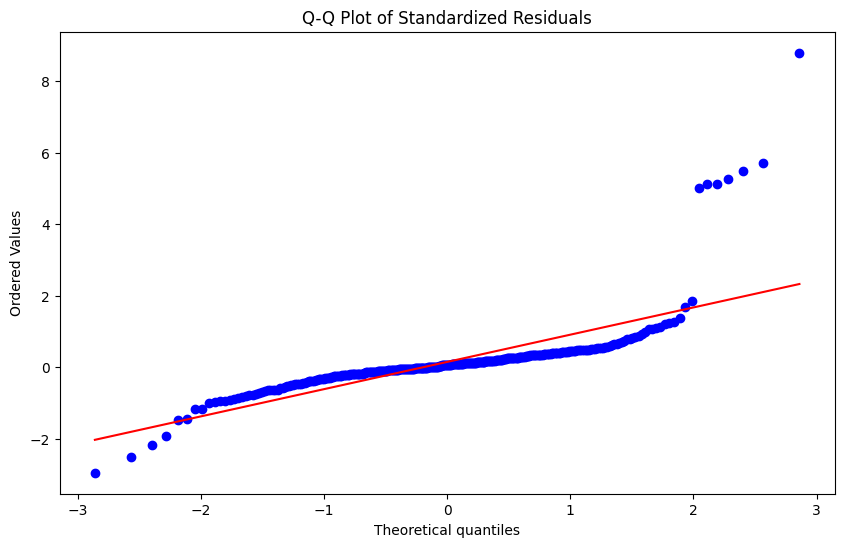

In [ ]:
# Residuals
residuals = model_fit.resid
standardized_residuals = residuals / np.std(residuals)

# Plot the residuals and standardized residuals
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(residuals)
plt.title('Residuals')

plt.subplot(2, 1, 2)
plt.plot(standardized_residuals)
plt.title('Standardized Residuals')

plt.tight_layout()
plt.show()

# Plot ACF and PACF of standardized residuals
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(standardized_residuals, ax=plt.gca(), lags=40)
plt.title('ACF of Standardized Residuals')
plt.subplot(122)
plot_pacf(standardized_residuals, ax=plt.gca(), lags=40)
plt.title('PACF of Standardized Residuals')
plt.show()

# Perform Ljung-Box test
ljung_box_result = acorr_ljungbox(standardized_residuals, lags=[10], return_df=True)
print("Ljung-Box test result:")
print(ljung_box_result)

# Interpretation
if ljung_box_result['lb_pvalue'].values[0] > 0.05:
    print("Fail to reject the null hypothesis: Residuals are independently distributed.")
else:
    print("Reject the null hypothesis: Residuals are not independently distributed.")

# Plot the distribution of the standardized residuals
plt.figure(figsize=(10, 6))
sns.histplot(standardized_residuals, kde=True)
plt.title('Distribution of Standardized Residuals')
plt.show()

# Plot Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(standardized_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Standardized Residuals')
plt.show()

## Zone 3


In [ ]:
model = SARIMAX(train_zone3, order=(1, 0, 3), seasonal_order=(1, 1, 1, 7))
model_fit = model.fit(disp=False)

# Forecast and get predictions for the training data to get residuals
train_predictions = model_fit.fittedvalues
residuals = train_zone3 - train_predictions

# Print summary of the model
print(model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:              PowerConsumption_Zone3   No. Observations:                  327
Model:             SARIMAX(1, 0, 3)x(1, 1, [1], 7)   Log Likelihood               -4247.931
Date:                             Sat, 10 Aug 2024   AIC                           8509.862
Time:                                     14:05:54   BIC                           8536.240
Sample:                                 01-01-2017   HQIC                          8520.395
                                      - 11-23-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9783      0.006    156.658      0.000       0.966       0.991
ma.L1         -0.2522      

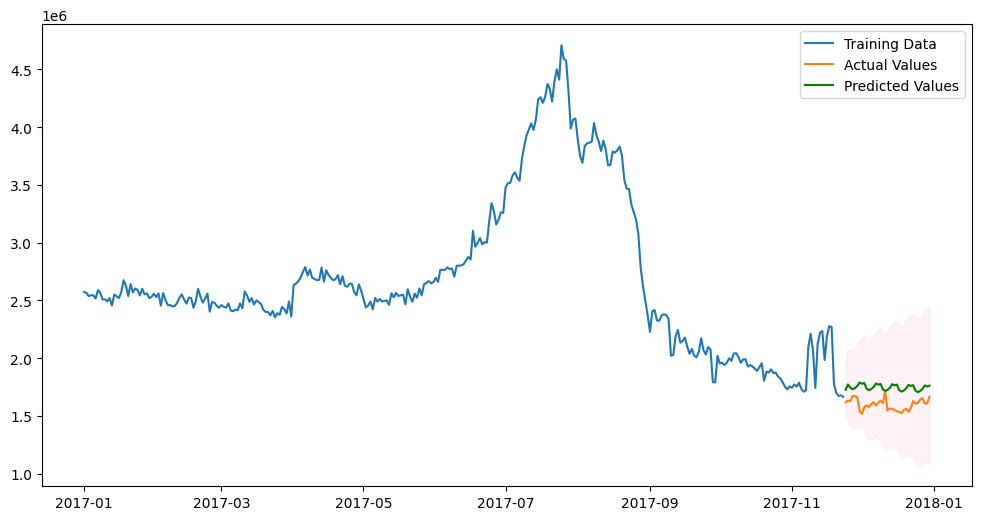

In [ ]:
# Make predictions
predictions = model_fit.get_forecast(steps=len(test_zone3))
predicted_mean = predictions.predicted_mean
conf_int = predictions.conf_int()

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_zone3, label='Training Data')
plt.plot(test_zone3, label='Actual Values')
plt.plot(predicted_mean, label='Predicted Values', color='green')
plt.fill_between(predicted_mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.legend()
plt.show()

### Residual Analysis

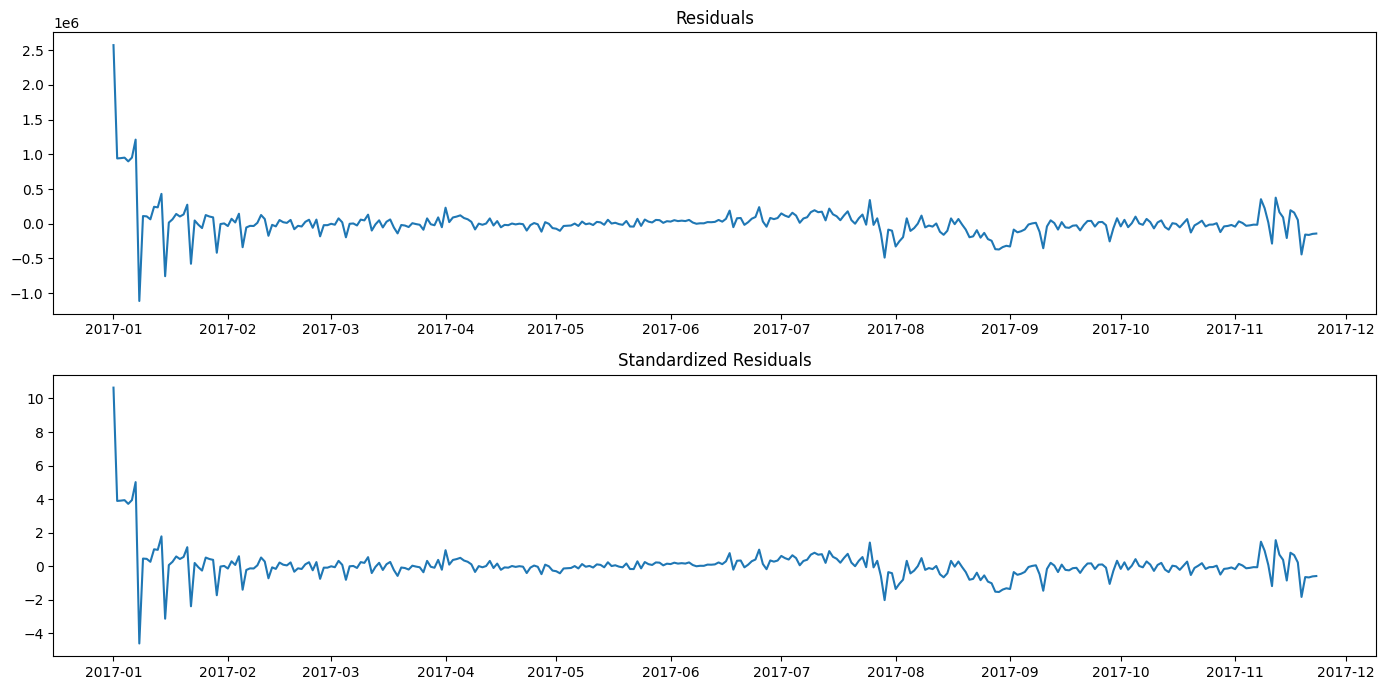

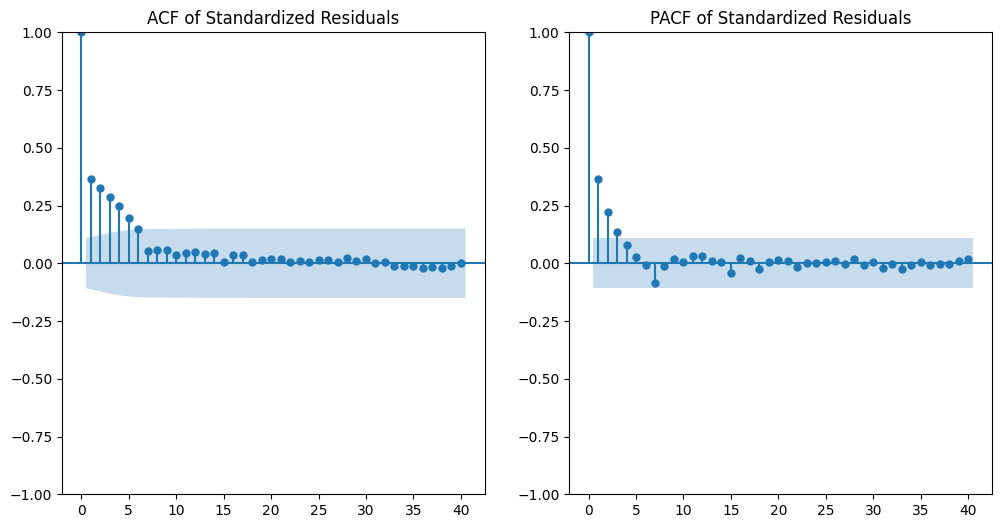

Ljung-Box test result:
       lb_stat     lb_pvalue
10  149.401241  4.949733e-27
Reject the null hypothesis: Residuals are not independently distributed.


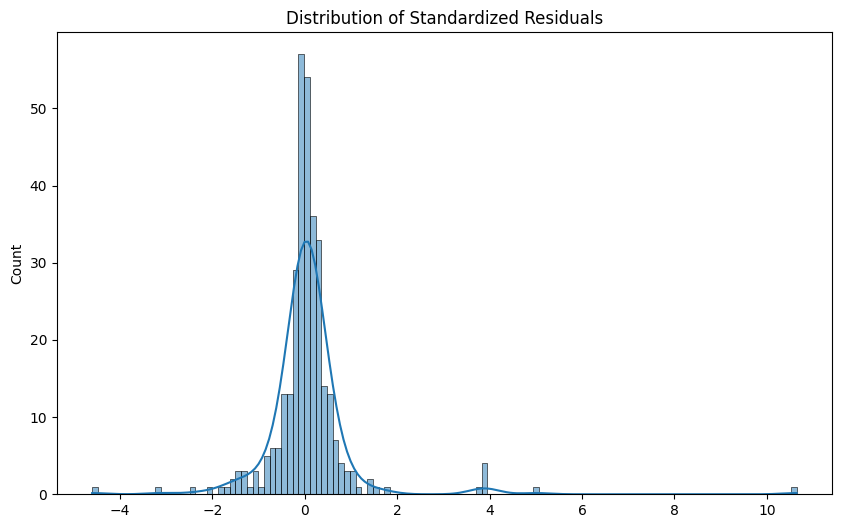

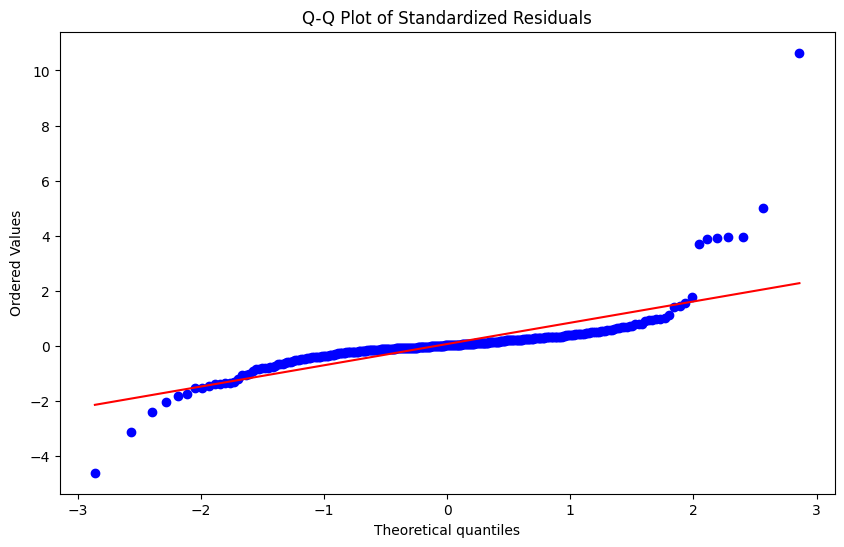

In [ ]:
# Residuals
residuals = model_fit.resid
standardized_residuals = residuals / np.std(residuals)

# Plot the residuals and standardized residuals
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(residuals)
plt.title('Residuals')

plt.subplot(2, 1, 2)
plt.plot(standardized_residuals)
plt.title('Standardized Residuals')

plt.tight_layout()
plt.show()

# Plot ACF and PACF of standardized residuals
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(standardized_residuals, ax=plt.gca(), lags=40)
plt.title('ACF of Standardized Residuals')
plt.subplot(122)
plot_pacf(standardized_residuals, ax=plt.gca(), lags=40)
plt.title('PACF of Standardized Residuals')
plt.show()

# Perform Ljung-Box test
ljung_box_result = acorr_ljungbox(standardized_residuals, lags=[10], return_df=True)
print("Ljung-Box test result:")
print(ljung_box_result)

# Interpretation
if ljung_box_result['lb_pvalue'].values[0] > 0.05:
    print("Fail to reject the null hypothesis: Residuals are independently distributed.")
else:
    print("Reject the null hypothesis: Residuals are not independently distributed.")

# Plot the distribution of the standardized residuals
plt.figure(figsize=(10, 6))
sns.histplot(standardized_residuals, kde=True)
plt.title('Distribution of Standardized Residuals')
plt.show()

# Plot Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(standardized_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Standardized Residuals')
plt.show()